## Decisive Distributions

### Import Dependencies

In [9]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [10]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [16]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2021-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-01", tz="America/New_York").isoformat()


# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

open     high     low   close     volume  \
timestamp                                                               
2021-03-01 05:00:00+00:00  123.75  127.930  122.79  127.79  116308112   
2021-03-02 05:00:00+00:00  128.40  128.720  125.01  125.12  102262884   
2021-03-03 05:00:00+00:00  124.81  125.710  121.84  122.06  112966488   
2021-03-04 05:00:00+00:00  121.75  123.600  118.62  120.13  178169060   
2021-03-05 05:00:00+00:00  121.00  121.935  117.57  121.42  153766510   

                           trade_count        vwap symbol  
timestamp                                                  
2021-03-01 05:00:00+00:00       924489  126.052824   AAPL  
2021-03-02 05:00:00+00:00       831905  126.113631   AAPL  
2021-03-03 05:00:00+00:00       992161  123.378028   AAPL  
2021-03-04 05:00:00+00:00      1689138  120.805730   AAPL  
2021-03-05 05:00:00+00:00      1472278  119.778815   AAPL

In [17]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])
# Display sample data
df_ticker.head()

SPY                                        \
                             open    high      low     close     volume   
timestamp                                                                 
2021-03-01 05:00:00+00:00  385.59  390.92  380.572  389.4300  105348798   
2021-03-02 05:00:00+00:00  389.82  390.07  386.000  386.5600   79595332   
2021-03-03 05:00:00+00:00  385.79  386.83  381.310  381.4000  119940211   
2021-03-04 05:00:00+00:00  381.22  384.00  371.880  376.6799  183435020   
2021-03-05 05:00:00+00:00  380.46  384.76  372.640  383.5600  152039624   

                                                     LUV                ...  \
                          trade_count        vwap   open   high    low  ...   
timestamp                                                               ...   
2021-03-01 05:00:00+00:00      570891  388.233476  59.55  59.84  57.67  ...   
2021-03-02 05:00:00+00:00      513110  388.267791  57.70  58.40  57.22  ...   
2021-03-03 05:00:00+00:00      807408  384.018230  58.47  58.67  57.60  ...   
2021-03-04 05:00:00+00:00     1338750  378.282177  57.72  57.88  54.26  ...   
2021-03-05 05:00:00+00:00     1163088  379.145999  56.36  57.13  52.29  ...   

                              SBUX                           WORK         \
                            volume trade_count        vwap   open   high   
timestamp                                                                  
2021-03-01 05:00:00+00:00  7931631      109741  108.043195  41.12  41.38   
2021-03-02 05:00:00+00:00  5016782       69211  107.188160  41.31  41.38   
2021-03-03 05:00:00+00:00  5313426       70543  106.963204  40.90  40.92   
2021-03-04 05:00:00+00:00  7211833       92858  105.506172  40.13  40.46   
2021-03-05 05:00:00+00:00  5559905       81376  104.608086  40.00  40.58   

                                                                           
                             low  close     volume trade_count       vwap  
timestamp                                                                  
2021-03-01 05:00:00+00:00  40.94  41.11  6946972.0     43652.0  41.165290  
2021-03-02 05:00:00+00:00  40.90  40.92  4006693.0     30226.0  41.037776  
2021-03-03 05:00:00+00:00  40.10  40.25  5607482.0     43101.0  40.386877  
2021-03-04 05:00:00+00:00  39.62  39.95  8319420.0     65123.0  39.940027  
2021-03-05 05:00:00+00:00  39.78  40.45  6107398.0     45246.0  40.248428  

[5 rows x 42 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [18]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

SPY    LUV     DIS    AAPL    SBUX   WORK
2021-03-01  389.4300  58.06  194.98  127.79  106.87  41.11
2021-03-02  386.5600  57.81  193.94  125.12  107.20  40.92
2021-03-03  381.4000  57.82  192.26  122.06  106.22  40.25
2021-03-04  376.6799  56.08  188.03  120.13  104.89  39.95
2021-03-05  383.5600  56.92  189.99  121.42  105.20  40.45

### Calculate the daily returns for each stock using the `pct_change()` function

In [19]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

SPY       LUV       DIS      AAPL      SBUX      WORK
2021-03-02 -0.007370 -0.004306 -0.005334 -0.020894  0.003088 -0.004622
2021-03-03 -0.013349  0.000173 -0.008662 -0.024457 -0.009142 -0.016373
2021-03-04 -0.012376 -0.030093 -0.022001 -0.015812 -0.012521 -0.007453
2021-03-05  0.018265  0.014979  0.010424  0.010738  0.002955  0.012516
2021-03-08 -0.004797  0.063774  0.062740 -0.041674 -0.001616 -0.010383

### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

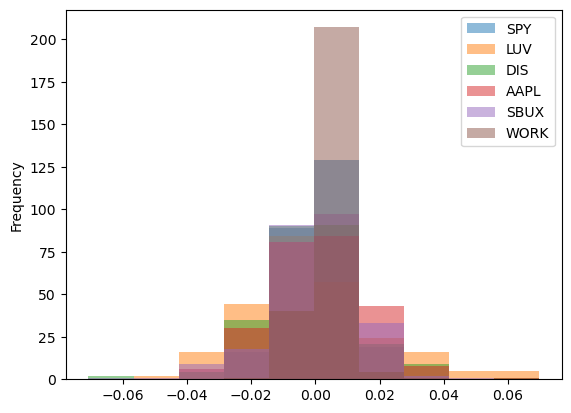

In [20]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

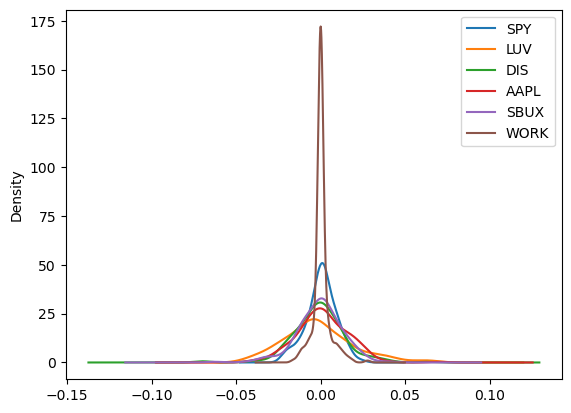

In [21]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()